# Numpy cheatsheet
## ECO 586 : Phenomenology and modeling of financial markets

### José Moran, Michael Benzaquen


This course supposes basic familiarity with the `Python` programming language. We will work with `Python 3` and `Jupyter` notebooks, which are now commonplace among data scientists and researchers. A notebook is a collection of cells that can contain either code or `Markdown` text (as in this cell). Figures and animations can also be shown on notebooks. 


The goal of this notebook is to present you with the numerical tools needed for the course. We shall introduce the base of numerical analysis with Python using the `NumPy` library.
This library is broadly used in academia, finance and industry, and is basically designed to provide an efficient environment to work with arrays and their representations as vectors, matrices or tensors. Its goal is therefore to provide very efficient high-level functions to work with these objects. 
Behind the scenes, `NumPy` does nearly all operations using compiled C programmes. It is therefore always better to use `NumPy` functions to work with arrays.

### Refresher on `Python` arrays

Arrays in `Python` are very broad and are called `list`s : they are just a collection of objects that need not be of the same type. We can declare them as

In [1]:
list0 = [1,2,3,4]  #a list of integers
list1 = [1,'foo', 'bar', [4,5]] #a list containing an integer, two strings and another list
list2 = [i for i in range(20) if i%2 == 0] #a list defined using a comprehension list: it will contain 
                                            #all even numbers up to 20
print(list2)
list2.append(20) #we can add elements to a list
print("After appending 20, ", list2)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
After appending 20,  [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]


This extremely flexible definition has its caveats: memory allocation is complicated for a list containing objects of varying size. Let's see how `numpy` arrays work. To do this, we have to first import the library under the common alias `np`

In [2]:
import numpy as np

We can convert lists to `numpy` arrays, and the library will use the correct type for  variables:

In [3]:
array0 = np.array(list0)
print(array0)
print("Numpy infers the type of the objects inside the array, ", array0.dtype)



array1 = np.array(list1)
print(array1)
print("With mixed types, the type 'object' is inferred, ", array1.dtype)

[1 2 3 4]
Numpy infers the type of the objects inside the array,  int64
[1 'foo' 'bar' list([4, 5])]
With mixed types, the type 'object' is inferred,  object


We can also force a certain type:

In [4]:
array0f = np.array(list0, dtype=float)
print("Compare an array of floats ", array0f,"\nwith an array of integers", array0)

Compare an array of floats  [1. 2. 3. 4.] 
with an array of integers [1 2 3 4]


### Operations on arrays
#### Sums and multiplications

The cool thing about `numpy` arrays is that they are designed to have vector and matrix-like operations, consider two arrays:

In [5]:
a = np.linspace(0,1,10) # 10 evenly spaced points between 0 and 1
b = np.arange(10) # an array containing [0,...,9]

As one would expect, the array defined by `2*a` contains the variables $2a_i$. Similarly, `1+a` is an array with values $1+a_i$, and `1/(1+a)` has values $1/(1+a_i)$

In [6]:
np.set_printoptions(precision = 2) #setting the number of printed decimals to 2
print(a)
print(2*a)
print(1+a)
print(1/(1+a))

[0.   0.11 0.22 0.33 0.44 0.56 0.67 0.78 0.89 1.  ]
[0.   0.22 0.44 0.67 0.89 1.11 1.33 1.56 1.78 2.  ]
[1.   1.11 1.22 1.33 1.44 1.56 1.67 1.78 1.89 2.  ]
[1.   0.9  0.82 0.75 0.69 0.64 0.6  0.56 0.53 0.5 ]


We can also do the same for vectors of the same size, that is to say that `a*b` or `a/(b+1)` 

In [7]:
print(a*b)
print(a/(b+1))

[0.   0.11 0.44 1.   1.78 2.78 4.   5.44 7.11 9.  ]
[0.   0.06 0.07 0.08 0.09 0.09 0.1  0.1  0.1  0.1 ]


### Mathematical functions

We can also use a lot of built-in mathematical functions from numpy to apply them to arrays. In short, given a function `f` we can simply define an array `f(a)` such that `f(a)[i] = f(a[i])`. 

In [8]:
x = np.arange(4)
print(x, np.sin(x), sep='\n')
print("sin(1)={}".format(np.sin(1)))

[0 1 2 3]
[0.   0.84 0.91 0.14]
sin(1)=0.8414709848078965


There are many functions, `np.arctan, np.log, np.log10, np.exp`....

#### Matrices and tensors
Arrays can be more general objects than simple "vectors", and in fact can be a "tensor" of shape $(N_1\times\ldots\times N_k)$. We can recast any vector of size $N_1 \ldots N_k$ into an array of shape  $(N_1\times\ldots\times N_k)$ using the reshape method.

In [9]:
matrix = np.arange(9).reshape(3,3)
matrix

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

We can also define arrays using the following syntax,

In [10]:
matrix = np.array([[0,1,2],
                  [3,4,5],
                  [6,7,8]])

We can also transpose arrays using `np.transpose(a)` or the `a.tranpose()` method.

In [11]:
vector = np.ones(3)
print(matrix.transpose())
print(np.transpose(vector))

[[0 3 6]
 [1 4 7]
 [2 5 8]]
[1. 1. 1.]


`Numpy` does standard tensor contraction (e.g. matrix/vector multiplication) by taking two arrays with coordinates $a_{i_1,\ldots,i_k}$ and $b_{i_k,\ldots,i_M}$, where $0\leq i_l\leq N_l$ and defining their dot product as `a.dot(b)` or `np.dot(a,b)` as $\sum_{i_k}a_{i_1,\ldots,i_k}b_{i_k,\ldots,i_M}$.

In [12]:
print(matrix, "  times ", vector, " equals ", matrix.dot(vector))

[[0 1 2]
 [3 4 5]
 [6 7 8]]   times  [1. 1. 1.]  equals  [ 3. 12. 21.]


The dot product does not necessarily correspond to the standard matrix/vector multiplication in linear algebra. For example if we compute the product `np.dot(v,v.transpose())` this will not return a matrix,

In [13]:
print(np.dot(vector, vector.transpose()))

3.0


In the case of a vector, 

In [14]:
print(np.matmul(np.matrix(vector).T, np.matrix(vector)))

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


An useful function is `np.sum`, which can be used to sum over the axis of an array. If no `axis` is passed to the function, then `np.sum(a)` is the sum over all the components of the array. However, passing `axis=l` returns an array where the $l$-th component has been summed over, e.g. $\sum_{i_l} a_{i_1,\ldots,i_l,\ldots,i_k}$.

In [15]:
print("Sum of all the terms: ", np.sum(matrix))
print("Sums of columns: ", np.sum(matrix,axis=1))

Sum of all the terms:  36
Sums of columns:  [ 3 12 21]


Let's compare the advantages of `numpy` over standard lists on a simple example: the time taken to compute the sum of all integers from $1$ to $10^7$. 

In [16]:
%%time 
#the above line of "python magic" times the whole execution cell
s = 0 
for i in range(1,int(1e7)):
    s += i
print(s)

49999995000000
CPU times: user 914 ms, sys: 9 µs, total: 914 ms
Wall time: 912 ms


In [17]:
%time np.sum(np.arange(1,1e7)) #this times just the single line

CPU times: user 17.7 ms, sys: 8.07 ms, total: 25.8 ms
Wall time: 24.6 ms


49999995000000.0

It is therefore in general **better to avoid loops and to use `numpy` arrays and their methods/functions.**

### Alternate ways to define arrays and do computations

Sometimes we want to construct an array using a function, so that `a[i,j] = f(i,j)`. We can do this very easily using the `np.fromfunction` function. For instance let's define `a[i,j]=i-j` a $3\times3$ array. 

In [18]:
a = np.fromfunction(function = lambda i,j : i-j, shape = (3,3)) 
print(a)

[[ 0. -1. -2.]
 [ 1.  0. -1.]
 [ 2.  1.  0.]]


We can also first define a list and then convert it to a `numpy` array.

In [19]:
print(np.array([i-j for i in range(3) for j in range(3)], dtype=float).reshape(3,3))

[[ 0. -1. -2.]
 [ 1.  0. -1.]
 [ 2.  1.  0.]]


### Algebra

`numpy` has a module called `numpy.linalg` with a series of functions that can be used for standard algebraic operations : matrix diagonalization, Cholesky decomposition (something that will be useful when generating correlated noise).
As an example, we'll define a positive definite matrix $M=LL^T$ with $L$ a triangular matrix. We will compute its spectrum and its Cholesky decomposition.

NOTE: to get the lower triangular (upper triangular) matrix from a matrix `M` we can use the function `np.tril` (`np.triu`) 

In [20]:
L = np.triu(np.ones((3,3)))
M = L.dot(L.transpose())
print(M)

[[3. 2. 1.]
 [2. 2. 1.]
 [1. 1. 1.]]


In [21]:
#diagonalization
D,P = np.linalg.eigh(M)
print("Eigenvalues :",D)
print("Eigenvector matrix:\n", P)

Eigenvalues : [0.31 0.64 5.05]
Eigenvector matrix:
 [[ 0.33 -0.59 -0.74]
 [-0.74  0.33 -0.59]
 [ 0.59  0.74 -0.33]]


In [22]:
#Cholesky decomposition 
L = np.linalg.cholesky(M)
print(L)
print(np.dot(L, L.T)) #a.T is equivalent to a.transpose()

[[1.73 0.   0.  ]
 [1.15 0.82 0.  ]
 [0.58 0.41 0.71]]
[[3. 2. 1.]
 [2. 2. 1.]
 [1. 1. 1.]]


We can also invert a matrix using `np.linalg.inv`

In [23]:
print(np.linalg.inv(M))
print(np.dot(np.linalg.inv(M), M) )

[[ 1. -1.  0.]
 [-1.  2. -1.]
 [ 0. -1.  2.]]
[[1.00e+00 0.00e+00 0.00e+00]
 [4.44e-16 1.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 1.00e+00]]


(This may show some rounding errors). 

### Boolean operations

Boolean operations also translate well to numpy, and are made element by element. For example we can check for parity:

In [24]:
a = np.arange(10)
print(a)
print(a%2 == 0)
b = np.ones(10) * 4 
print(b)
print(a==b)

[0 1 2 3 4 5 6 7 8 9]
[ True False  True False  True False  True False  True False]
[4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
[False False False False  True False False False False False]


Given a boolean array, we can check if $a_1\wedge\ldots\wedge a_k$ using `np.all(a)` and $a_1\vee\ldots\vee a_k$ using `np.any`.

In [25]:
print("All elements of a < 20 : ", np.all(a < 20))
print("At least one element of a = 1.5, ", np.any(a == 1.5))

All elements of a < 20 :  True
At least one element of a = 1.5,  False


## Accessing data in an array


As corresponds to intuition, we can always access the element $a_{i,j,k}$ of an array using `a[i,j,k]`. Note that this is different to the `a[i][j][k]` syntax we would use to access the element using a list, which in this case would be a list of lists of lists. 

However, given a list of indices $l=(i_1,\ldots,i_l)$ we can define the array `a[l]` so that `a[l][k] = a[l[k]]`, for example

In [26]:
l = [2,4,1]
a = np.linspace(0,1,5)
print(a)
print(a[l])

[0.   0.25 0.5  0.75 1.  ]
[0.5  1.   0.25]


Given also a boolean array `b` of the same size as `a`, the array `a[b]` contains all the elements of `a` that correspond to a `True` value in `b`. For example

In [27]:
a = np.arange(3)
print(a)
b = np.array([True, False,True])
print(a[b])

[0 1 2]
[0 2]


This can be **extremely** useful to filter data, let's for example filter out the even integers between $0..25$: 

In [28]:
a = np.arange(25)
b = (a%2 == 0)
print(a[b])
print(a[a%2 == 0]) #quicker way

[ 0  2  4  6  8 10 12 14 16 18 20 22 24]
[ 0  2  4  6  8 10 12 14 16 18 20 22 24]


Another useful tool is the slicing of an array. For example, `a[2:5] = [a[2], a[3], a[4]]`, i.e.

In [29]:
a = np.linspace(0,1,10)
print(a)
print(a[5:8])

[0.   0.11 0.22 0.33 0.44 0.56 0.67 0.78 0.89 1.  ]
[0.56 0.67 0.78]


Slicing arrays is particularly useful when dealing with multi-dimensional arrays. For example given a matrix `M` and a column index `j`, the array `M[:,j]` contains the j-th column of the matrix. Similarly, `M[2:5,j]` would contain rows 2,3 and 4 of that column vector.

In [30]:
M = np.arange(9).reshape(3,3)
print(M)
print("Second column :", M[:,1])
print("Third row : ", M[2,:])

[[0 1 2]
 [3 4 5]
 [6 7 8]]
Second column : [1 4 7]
Third row :  [6 7 8]


Note also that `numpy` arrays can take negative indices. If the length of the array is $N$, then it simply defines `a[-l] = a[N-l]`, as

In [31]:
a = np.array([2,5,6,3,1])
a[-3]

6

### Rolling arrays

An useful function is `np.roll(array, shift)`, it works rather simply, if `b = np.roll(a, shift = k)` then `b[n] = a[n+k]`, and `b` has the same size as `a`. 

Arrays can be rolled on different axes. 

In [32]:
a = np.array([2,5,6,3,1])

print(a)
print(np.roll(a, 1))
print(np.roll(a, -1))

[2 5 6 3 1]
[1 2 5 6 3]
[5 6 3 1 2]


### Selecting data with `np.where`

An useful function is also `np.where(condition, value if true, value if false)`, extremely useful when filtering data. 
Take for example the following example,

In [33]:
a = np.array([2,5,6,3,1,8])

b = np.where( a // 2 == 0 , 'even', 'uneven')

In [34]:
print(b)

['uneven' 'uneven' 'uneven' 'uneven' 'even' 'uneven']


## Plotting with `matplotlib.pyplot`

There are many different libraries to plot data in `Python`. Here we will use `matplotlib.pyplot`. To use it, we first need to import it, and we choose for it the common alias `plt`. 

We also include a line of `Jupyter magic` to have the plots appear inside our notebook, `%matplotlib inline`. 

In [35]:
import matplotlib.pyplot as plt 
%matplotlib inline

This library is quite rich, but we will only use it for basic plots and histograms. 
Given two vectors $x$ and $y$ of the same size we can plot $y(x)$ using `plt.plot(x,y)`, for example

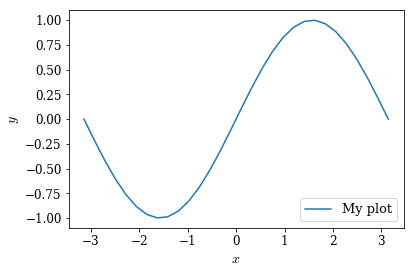

In [36]:
x = np.linspace(-np.pi, np.pi, 30)
y = np.sin(x)
plt.plot(x,y, label='My plot')
plt.xlabel('$x$') #label x axis, matplotlib knows LaTeX
plt.ylabel('$y$') #label y axis
plt.legend(loc='lower right') #make plot labels appear
plt.show()

We can also play with the axis scaling, choosing for example a log scaling or choosing the extent of representation using `plt.xlim(x_min, x_max)` and `plt.ylim(y_min, y_max)`.

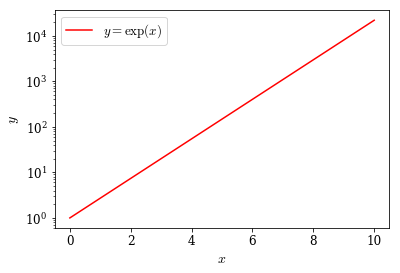

In [37]:
x = np.linspace(0,10,30)
y = np.exp(x)
plt.plot(x,y, label='$y = \exp(x)$', color='red')
plt.yscale('log')
plt.xlabel('$x$') #label x axis
plt.ylabel('$y$') #label y axis
plt.legend()
plt.show()

We can also do histograms using `plt.hist`, but we will cover this in the following part concerning the `np.random` module.

## Random number generation

`numpy` also has a `np.random` module that can be used to generate random numbers from well known distributions. The full list is available at https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html. 
These distributions allow to generate arrays where each element has been sampled according to a given distribution.
In general the syntax to sample an array with a certain `shape` from a distribution is `a = np.random.distribution(*distribution parameters, shape)`. 

Let's draw 1000 samples from the random distribution and put it into an array `u`.

In [38]:
u = np.random.rand(1000)
print("First 10 samples: ", u[:10])

First 10 samples:  [0.49 0.75 0.55 0.96 0.93 0.18 0.48 0.43 1.   0.3 ]


We can now plot the histogram for this using `plt.hist(u)`, we can also pass something to the `bins` argument : either the number of bins we want to have in our histogram, an array containing the bin edges, or a a method to compute bins (more advanced). 

We also choose to pass the `density=True` argument so that the histogram corresponds to a density and not just a frequency. 

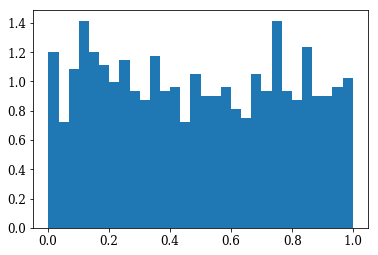

In [39]:
plt.hist(u, bins=30, density=True)
plt.show()

We can also compute cumulative empirical histograms, passing `cumulative=True` to plot the empirical cdf $P(X<x)$ for the random variable `X`. Passing `cumulative=-1` gives the survival function $1-P(X<x)$

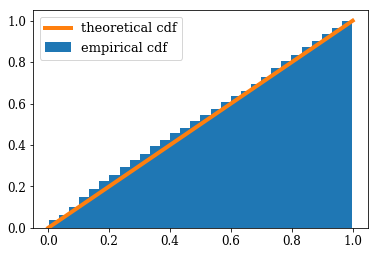

In [40]:
plt.hist(u, bins=30, density=True, cumulative=True, label='empirical cdf')
x = np.linspace(0,1)
plt.plot(x,x, lw = 4, label='theoretical cdf') #lw stands for line width

plt.legend()
plt.show()


The keyword `histtype='step'` shows a step histogram instead of a bar histogram.

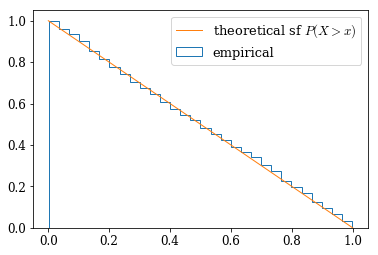

In [42]:
plt.hist(u, bins=30, density=True, cumulative=-1,histtype='step', label='empirical')
x = np.linspace(0,1)
plt.plot(x,1-x, lw = 1, label='theoretical sf $P(X>x)$') #lw stands for line width

plt.legend()
plt.show()


### Generating brownian motion

We want to generate a brownian motion as $x_{t+1} = x_{t} + \sigma \xi_t$, where $\xi_t\sim \mathcal{N}(0,1)$.
We can do this very naively using `np.random.randn()` recursively, or generate $\xi$ once and for all, e.g. 

In [43]:
T = 10000 # simulation time
sigma = np.sqrt(1e-3)


In [44]:
%%time 
x_naive = np.empty(T) #allocate memory space, this can help save time ! 
x_naive[0] = 0
for t in range(1,T):
    x_naive[t] = x_naive[t-1] + sigma * np.random.randn()

CPU times: user 21.3 ms, sys: 31 µs, total: 21.4 ms
Wall time: 20.6 ms


In [45]:
%%time
x_smart = np.empty(T)
xi = np.random.randn(T-1)
x_smart[0] = 0
for t in range(1,T):
    x_smart[t] = x_smart[t-1] + sigma * xi[t-1]

CPU times: user 9.54 ms, sys: 46 µs, total: 9.59 ms
Wall time: 8.84 ms


In [46]:
plt.plot(range(T), x_naive, label='naive x')
plt.plot(range(T), x_smart, label='smart x')
plt.xlabel('$t$', fontsize=15)
plt.ylabel('$x_t$', fontsize=15)
plt.legend()


Statistically, both objects are the same. The second one took half the time to generate however. Nevertheless this is not the smartest, most "numpyesque" way to do things. 
In this case one can easily see that $x_t = \sigma \sum_{k=0}^{t-1} \xi_t$. 

We can use a dedicated function called `np.cumsum` that computes the cumulative sum of an array, i.e. 
`np.cumsum(a)[i] := np.sum(a[:i])`. 

In [47]:
%%time
x_smartest = np.zeros(T)
x_smartest[1:] = np.cumsum(sigma * np.random.randn(T-1))

CPU times: user 1.74 ms, sys: 60 µs, total: 1.8 ms
Wall time: 966 µs


The computation time is significantly faster, and shows that **learning to use numpy properly pays**, and in particular one should try to formulate what one wants to compute in the simplest way possible.

In [48]:
plt.plot(range(T), x_smartest)

In [49]:
xi = np.random.randn(5,T)

In [50]:
xx = np.cumsum(xi, axis=1)
for i in range(5):
    plt.plot(range(T), xx[i,:])